In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline
plt.style.use('seaborn')

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
ls

log_brake_2020-07-16-11-38-14.bag       log_steer.ipynb
log_brake_baru_2020-07-16-11-51-28.bag  test.bag
log_brake.ipynb                         test.ipynb
log_steer_2020-07-15-14-24-24.bag


In [3]:
bag = rosbag.Bag('log_steer_2020-07-15-14-24-24.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Steering': 'fd8739ce284d08bb769f85965f7fc99b'}, topics={'/logging_steering': TopicTuple(msg_type='pkg_ta/Steering', message_count=15879, connections=1, frequency=243.81235830959716)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_steering']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

steering_delta = savgol_filter(np.array(list_steering_delta), 51, 3)
steering_angle = savgol_filter(np.array(list_steering_angle), 51, 3)

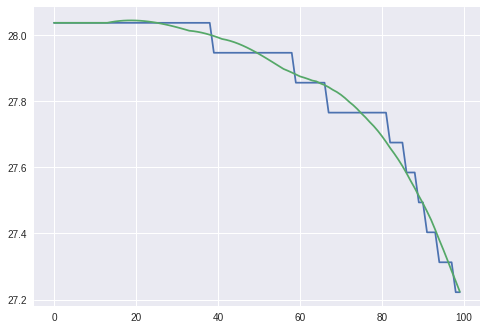

In [5]:
plt.plot(list_steering_angle[1700:1800])
plt.plot(steering_angle[1700:1800])

In [6]:
dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

In [7]:
#plt.hist(dt, bins=500, alpha=0.75)
#plt.hist(dt_header, bins=500, alpha=0.5)
plt.show()

In [8]:
print('Sampling Rate yang digunakan di rospy adalah 250 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('\ndt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))

Sampling Rate yang digunakan di rospy adalah 250 Hz

dt
mean: 0.004108127786074407
std: 0.00045417282505394544

dt_header
mean: 0.004108117650506899
std: 0.00032696945630691823


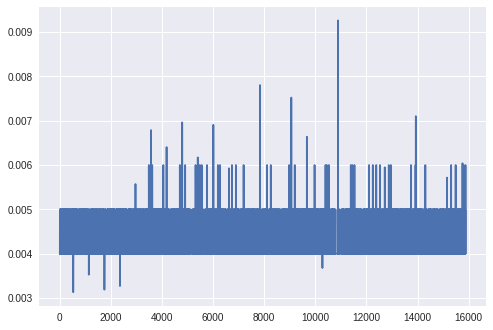

In [9]:
plt.plot(dt_header)

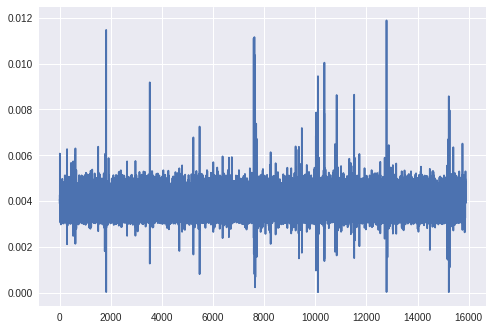

In [10]:
plt.plot(dt)

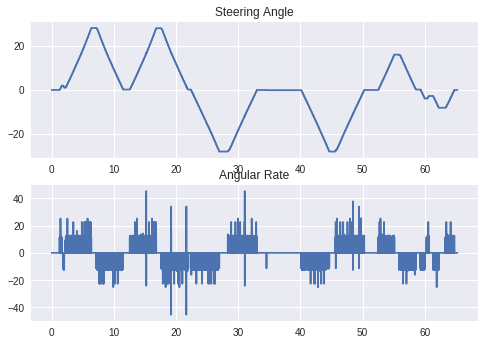

In [11]:
# UNFILTERED
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(list_t_header, list_steering_angle)
ax1.set_title('Steering Angle')
ax2.plot(list_t_header, np.gradient(np.array(list_steering_angle),list_t_header))
ax2.set_title('Angular Rate')
plt.show()

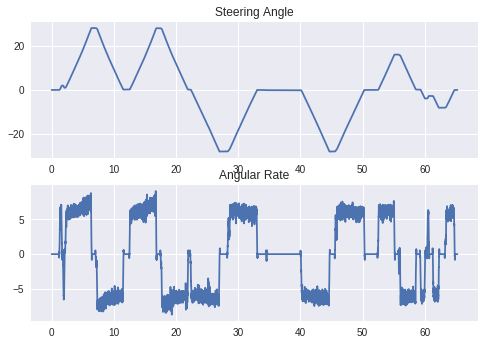

In [12]:
# FILTERED
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(list_t_header, steering_angle)
ax1.set_title('Steering Angle')
ax2.plot(list_t_header, np.gradient(steering_angle, list_t_header))
ax2.set_title('Angular Rate')
plt.show()